# Partitional Clustering

## Libraries

In [98]:
# Data and numerical libraries
import numpy as np
import pandas as pd

# Machine learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler

#----- Graph and Charts -----#
from matplotlib import pyplot as plt
import seaborn as sns

# Scripts
import sys
sys.path.insert(0, 'scripts')

import data_wrangling as dw
import dataviz

## Data wrangling

In [3]:
df, scaled_df = dw.read_dataset('dataset.csv')
dataviz.display_side_by_side(
        df, 
        scaled_df,
        titles = ['Non-Scaled Dataframe', 'Scaled Dataframe']
    )

,EN,MI,SE
job_title,,,
AI Scientist,7,3,1
Analytics Engineer,1,7,29
BI Data Analyst,5,6,0
Data Analyst,24,44,111
Data Architect,0,3,34
Data Engineer,18,81,199
Data Science Manager,0,4,21
Data Scientist,36,84,206
ETL Developer,0,2,8


The data was scaled using robust scaling (RobustScaler from sklearn.preprocessing) to avoid bias in a particular variable.

## K-Means

### Check the optimal number of clusters 

#### The silhoutte method

In [15]:
def silhouette_coefs(df):
    """
        Apply k-means for different numbers of clusters to obtain the silhouette coeficient for each case
        
        Arguments:
        Pandas DataFrame df: dataset to applied the methods
        
        Returns:
        NumPy Array sil: list with all silhoutte coefficients
        int n_clusters: list with the number of clusters on which the silhoutte coefficients was calculated
    """
    
    # Returns
    n_clusters = np.array(list(range(2, len(df) - 1)))
    sil = []
    
    # Auxiliar variables
    fitted_model = KMeans().fit(df)    
    
    # Apply k-means by assuming a determined number of clusters
    for n in n_clusters:
        sil.append(silhouette_score(df, KMeans(n_clusters = n).fit_predict(df)))
    
    return sil, n_clusters

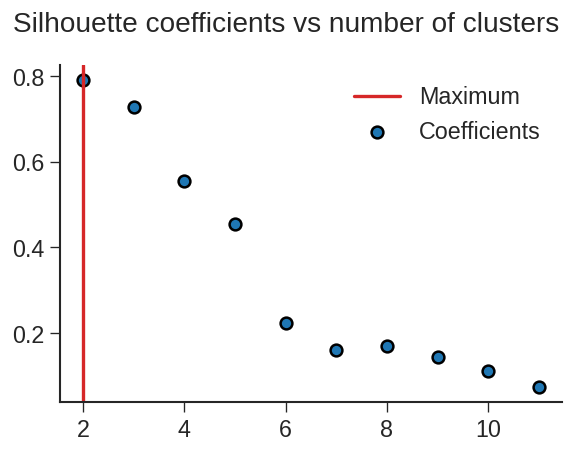

In [96]:
# Get silhouette_coefficients
sil, n_clusters = silhouette_coefs(scaled_df)

#----- Plotting silhouette coefficients -----#

# Figure and axes
fig = plt.figure(figsize = (5, 4), dpi = 120)
ax = plt.gca()

# Style
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

# Remove spines
ax.spines[['top', 'right']].set_visible(False)

# Maximum silhouette coefficient
ax.axvline(
        n_clusters[np.argmax(sil)], 
        color = sns.color_palette()[3],
        linewidth = 2,
        label = 'Maximum'
    )

sns.scatterplot(
        y = sil,
        x = n_clusters,
        ax = ax,
        s = 50,
        edgecolor = 'black',
        linewidth = 1.5,
        label = 'Coefficients'
    )


# Title and labels
ax.set_title('Silhouette coefficients vs number of clusters', pad = 20, x = 0.45)
#ax.set_xlabel('Number of Clusters')
#ax.set_ylabel('Silhoutte Coefficient')
ax.legend()

# Show and save figure
plt.subplots_adjust(right = 5.0)
plt.tight_layout()
plt.savefig('images/partitional/silhouette_coefficients.png', dpi = 120)
plt.show()

As we can see in the scatter plot above, the optimal number of clusters is two (`n_clusters = 2`) since it maximises the silhouette coefficient.

### Getting clusters through Scikit-Learn library

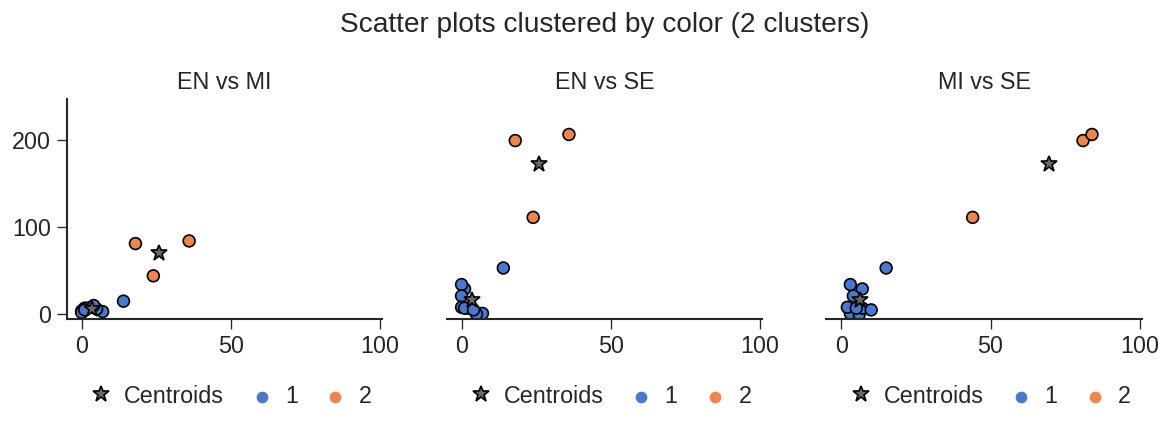

In [183]:
#----- KMeans -----#
n_clusters = 2
fitted_model = KMeans(n_clusters = n_clusters).fit(scaled_df)
scaler = RobustScaler().fit(df)
cluster_centers = scaler.inverse_transform(fitted_model.cluster_centers_)

#----- Set figure and Axis -----#

fig = plt.figure(figsize = (10, 5), dpi = 120)
gs = fig.add_gridspec(nrows = 1, ncols = 3)

ax = []
for i in range(1):
    for j in range(3):
        ax.append(fig.add_subplot(gs[i, j]))

        # Remove spines
        if j == 0:
            ax[-1].spines[['top', 'right']].set_visible(False)
        
        else:
            ax[-1].spines[['top', 'right', 'left']].set_visible(False)
            ax[-1].yaxis.set_tick_params(labelleft = False, left = False)
                
        ax[-1].set_ylim(-5, df.max().max()*1.2)
        ax[-1].set_xlim(-5, df['MI'].max()*1.2)
        
#----- Style -----#

plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

#----- Scatter plots -----#

titles = ['EN vs MI', 'EN vs SE', 'MI vs SE']
cols = [('EN', 'MI'), ('EN', 'SE'), ('MI', 'SE')]
idx_cols = [(0, 1), (0, 2), (1, 2)]

big_axes = fig.add_subplot(gs[0, :])
big_axes.set_title('Scatter plots clustered by color (2 clusters)', pad = 40)
big_axes.set_axis_off()

for j in range(3):  
    # Centre of the clusters
    
    for i in range(n_clusters):
        if i == 0: label = 'Centroids'
        else: label = '_nolegend_'
        
        ax[j].plot(
            cluster_centers[i][idx_cols[j][0]],
            cluster_centers[i][idx_cols[j][1]],
            marker = '*',
            linestyle = '',
            markersize = 10,
            color = 'dimgrey',
            markeredgecolor = 'black',
            label = label
        )   
    
    sns.scatterplot(
        data = df,
        x = cols[j][0],
        y = cols[j][1],
        ax = ax[j],
        hue = fitted_model.labels_ + 1,
        s = 50,
        linewidth = 1,
        edgecolor = 'black',
        palette = 'muted'
    )
    
    ax[j].set_title(titles[j], fontsize = 14)
    ax[j].set_xlabel('')
    ax[j].set_ylabel('')
    ax[j].legend(
        loc = 'lower center',
        labelspacing = 0.0,
        columnspacing = 0.6,
        handletextpad = 0.0,
        ncol = 3,
        bbox_to_anchor = (0.5, -0.5)
    )
        
#----- Show and/or save figure -----#

plt.tight_layout()
#plt.savefig('images/partitional/scatter_plots_with_clusters.png', dpi = 120)

The resultant clusters by k-means are similar to the agglomerative clustering (check the [hierarchical notebook](hierarchical.ipynb))